In [13]:
import numpy as np
import pandas as pd
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import math
from num2tex import num2tex



plt.rcParams.update({
    'font.size': 8,
    'text.usetex': True,
    'text.latex.preamble': r'\usepackage{amsfonts}',
    "figure.figsize": (6,4),
    'figure.dpi':150
})

sns.set_theme()
sns.set(font_scale=1.3)
sns.set_style("whitegrid")

def convert(a,b):
    numbers=[]
    for i in range(len(a)):
        number=0
        if (a[i]=='dkl'):
            number=number+10
        if(b[i]=='adaptive_variance' or b[i]=='adaptive_dkl'):
            number=number+3
        if(b[i]=='flat'):
            number=number+2
        if(b[i]=="forward"):
            number=number+1
        numbers.append(number)
    return numbers

<ipython-input-71-b619a63f6df0>:9: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grouped=db.groupby(['n_epochs','survey_strategy','loss'])['vegas_variance_ratio','vegas_unweighting_eff_ratio','value_std','vegas_target_std','vegas_target_unweighting_eff','value_unweighting_eff'].agg('median')


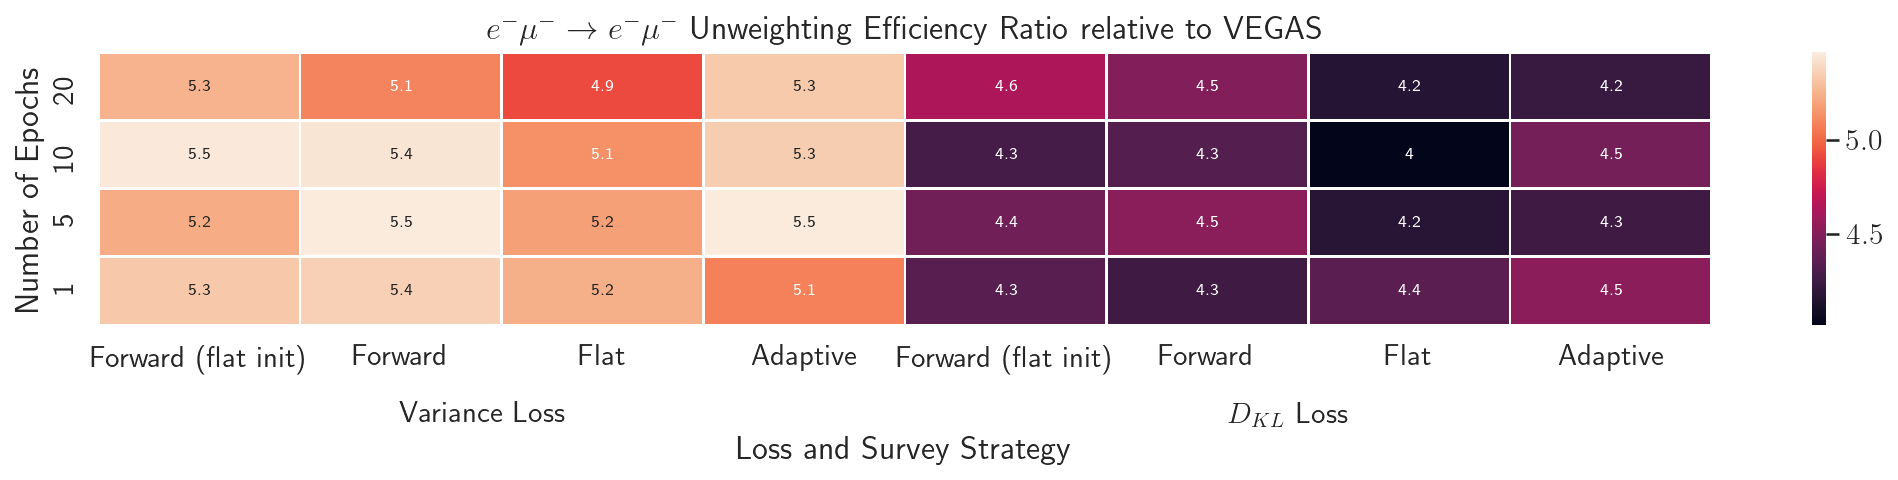

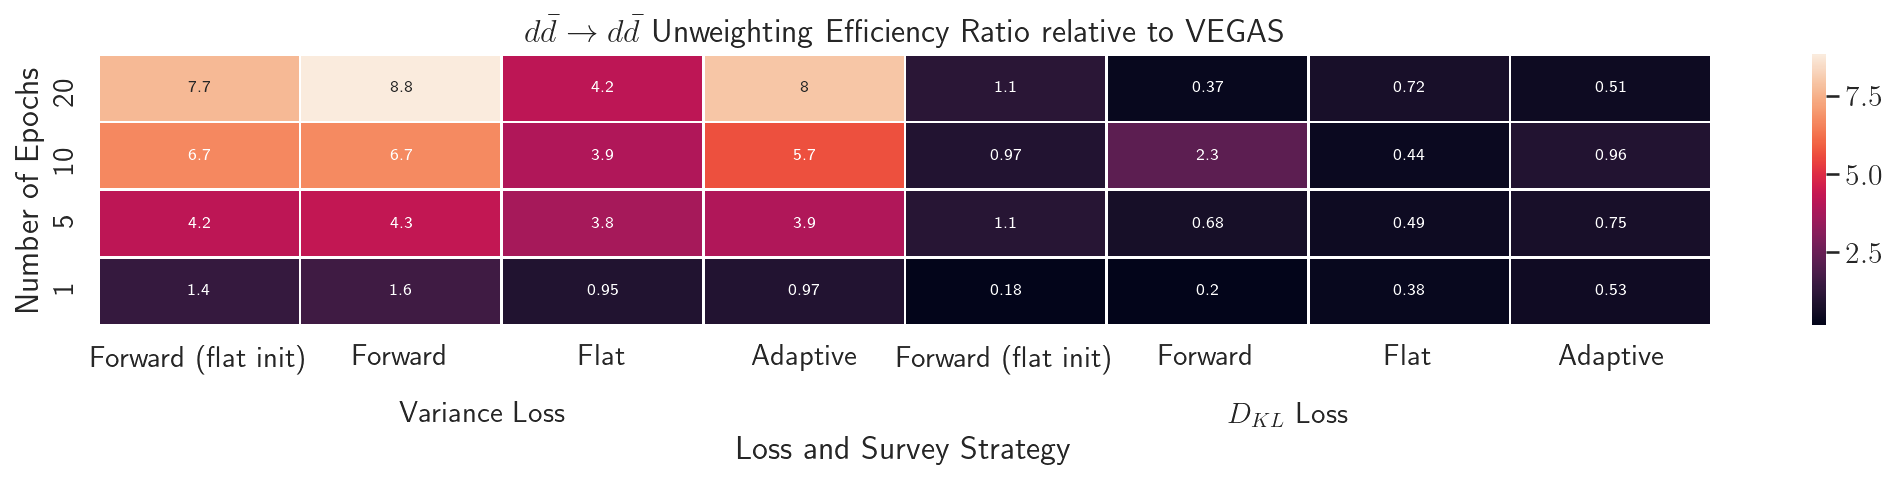

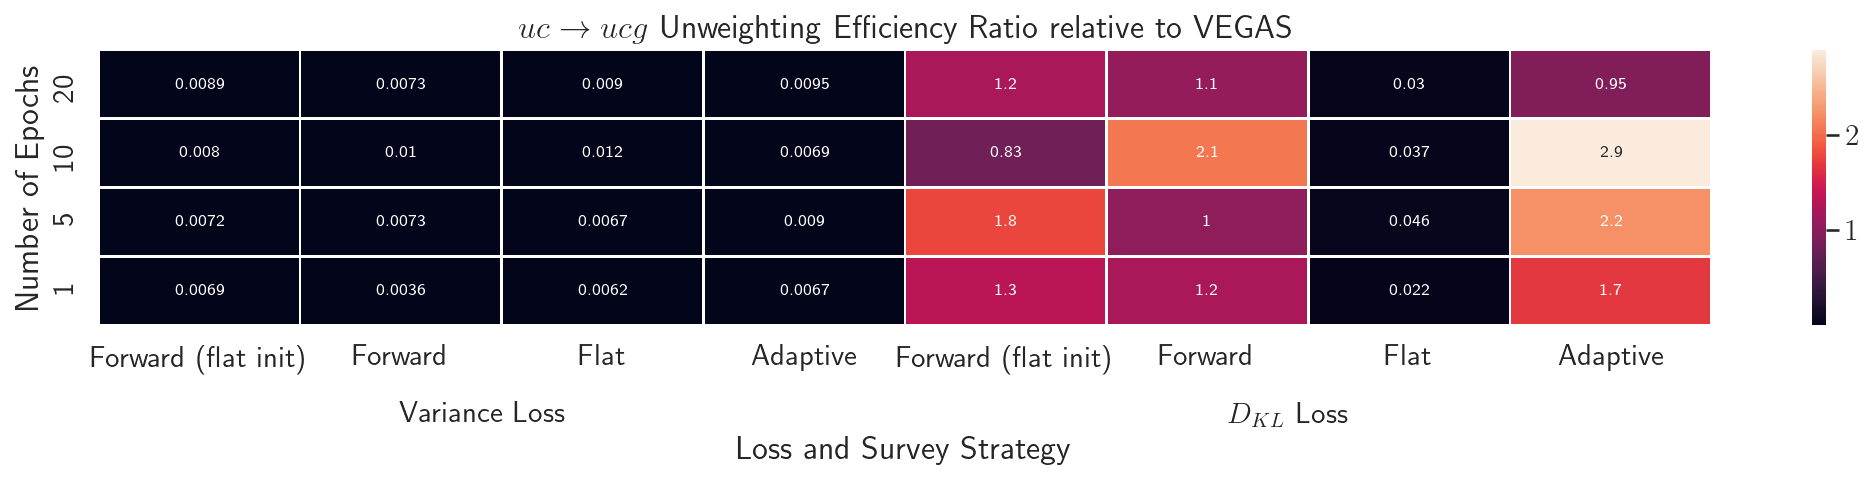

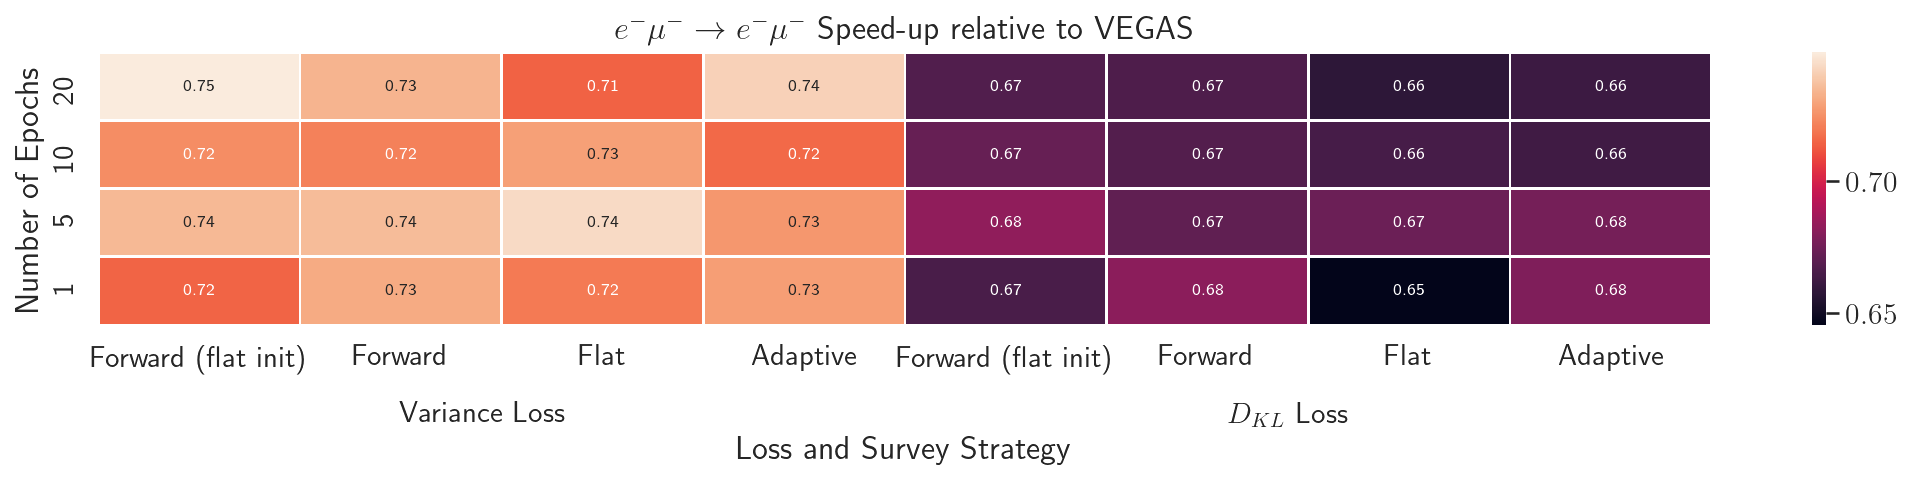

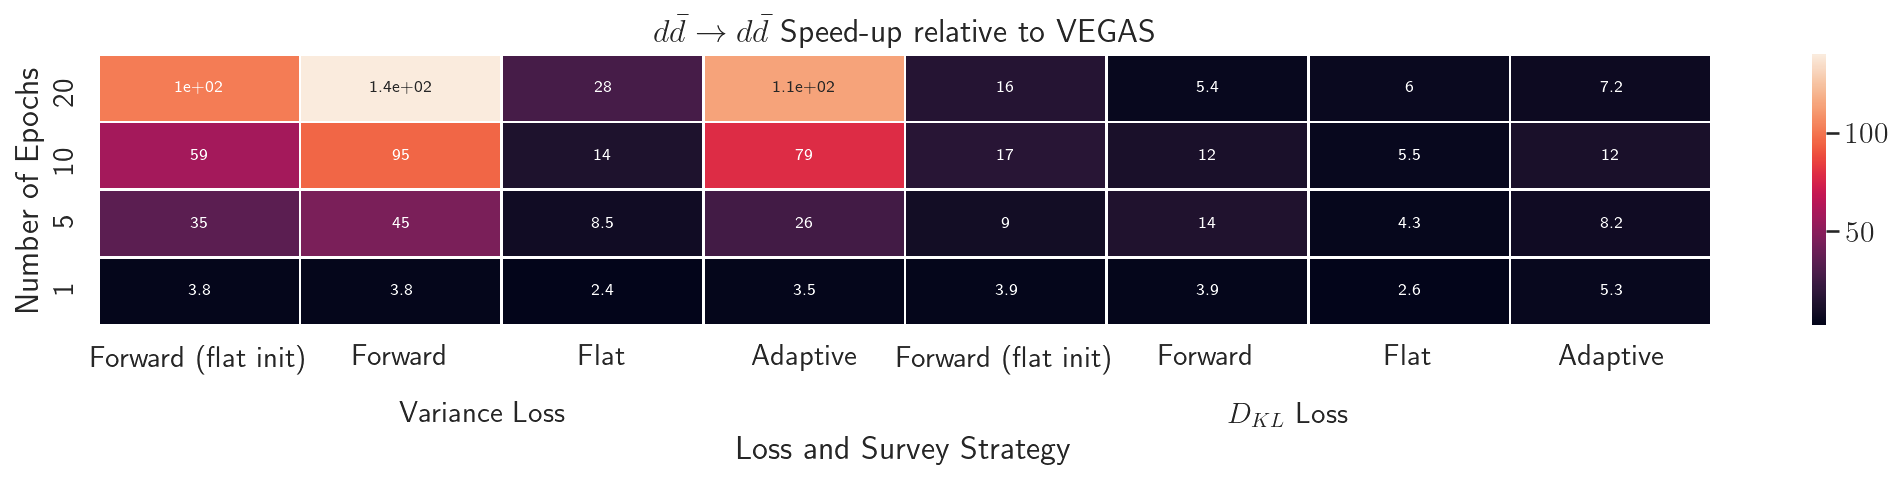

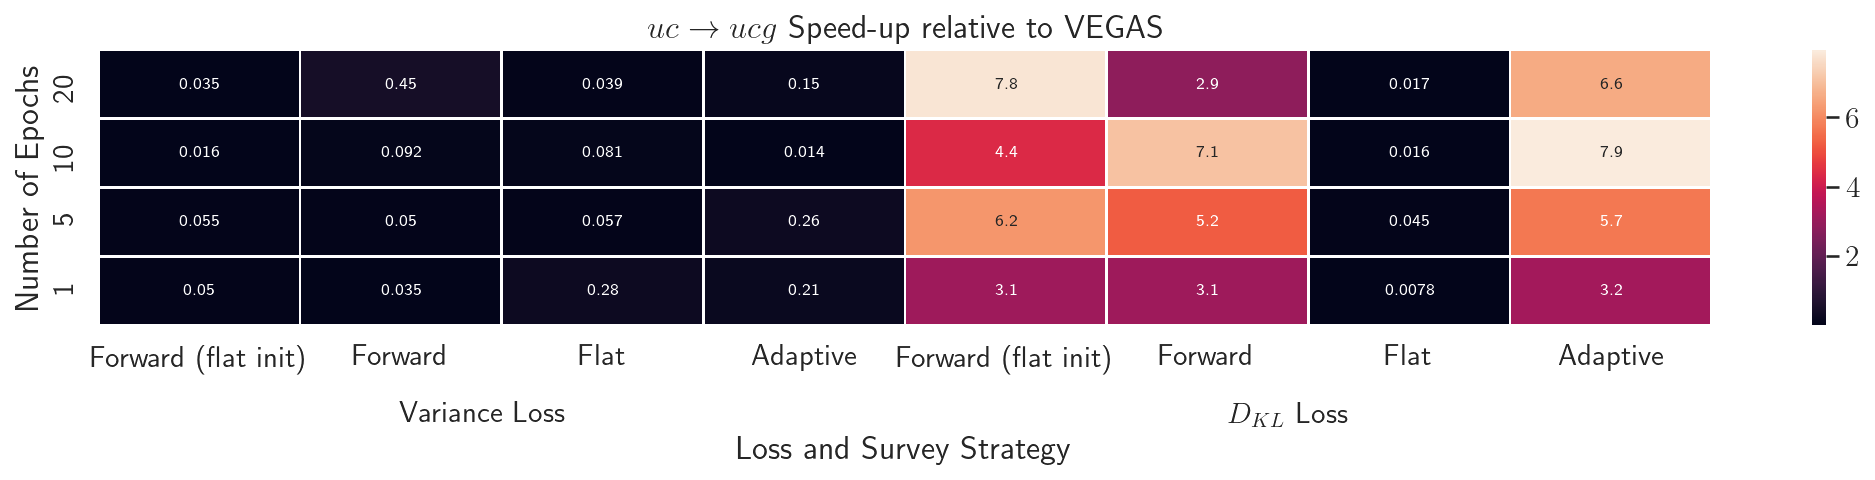

In [71]:
for z in ['uwr', 'speed']:
    for j in ["emu_emu_","dd_dd_","uc_ucg_"]:
        db=pd.DataFrame();
        result=pd.DataFrame();
        for i in [1,5,10,20]:
            db=pd.concat([db, pd.DataFrame(np.genfromtxt(str(j)+str(i)+'.csv', delimiter=',', dtype=None, names=True, encoding='utf-8'))])


        grouped=db.groupby(['n_epochs','survey_strategy','loss'])['vegas_variance_ratio','vegas_unweighting_eff_ratio','value_std','vegas_target_std','vegas_target_unweighting_eff','value_unweighting_eff'].agg('median')

        results_all=pd.DataFrame()
        for index, row in grouped.iterrows():
            results={}
            if(index[0]>0):
                
                results['n_epochs']=index[0]
                results['survey_strategy']=index[1]
                results['loss']=index[2]
                results['speed']=row['vegas_variance_ratio']
                results['uwr']=row['vegas_unweighting_eff_ratio']
                if(not np.isnan(results['speed'])):
                    results_all=results_all.append(results,ignore_index=True)

        draw=pd.DataFrame()
        draw['value']=results_all[z]
        draw['n_epochs']=results_all['n_epochs']
        draw['survey']=convert(results_all['loss'],results_all['survey_strategy'])
        
        result = draw.pivot(index='n_epochs', columns='survey', values='value')
        result.sort_values(by=['n_epochs'], inplace=True,ascending=False)

        fig, ax = plt.subplots(figsize=(14,3)) 

        sns.heatmap(result, cmap ='rocket', linewidths = 0.90, annot = True, ax=ax)
        ax.set_yticklabels([20,10,5,1])
        xticks_minor=[1.9,5.9]
        ax.set_xticks( xticks_minor, minor=True )
        ax.xaxis.set_minor_formatter(plt.FixedFormatter(['\n \n Variance Loss','\n \n $D_{KL}$ Loss']))
        ax.set_xticklabels(['Forward (flat init)','Forward','Flat','Adaptive','Forward (flat init)', 'Forward', 'Flat', 'Adaptive' ])
        ax.set_ylabel('Number of Epochs')
        ax.set_xlabel('Loss and Survey Strategy')
        if(j=='emu_emu_'):
            text=r'$e^- \mu^- \rightarrow e^- \mu^-$'
        elif(j=='dd_dd_'):
            text=r'$d \bar d \rightarrow d \bar d$'
        else:
            text=r'$u c  \rightarrow u c g$'
        if(z=='uwr'):
            ax.set_title(text+' Unweighting Efficiency Ratio relative to VEGAS')
        else:
            ax.set_title(text+' Speed-up relative to VEGAS')
        plt.tight_layout(pad=0)


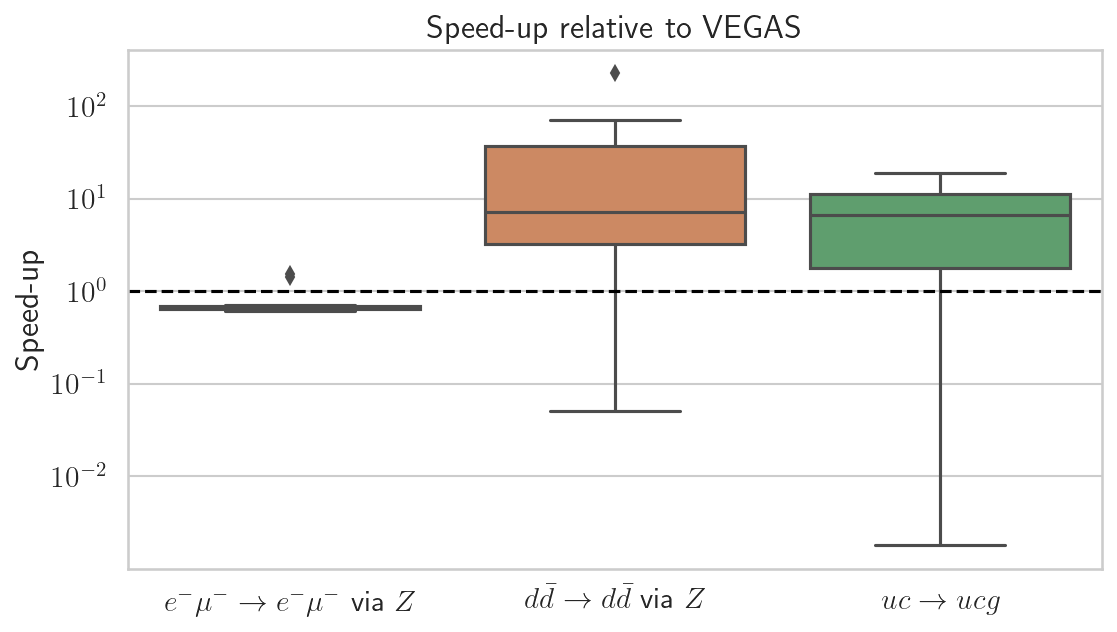

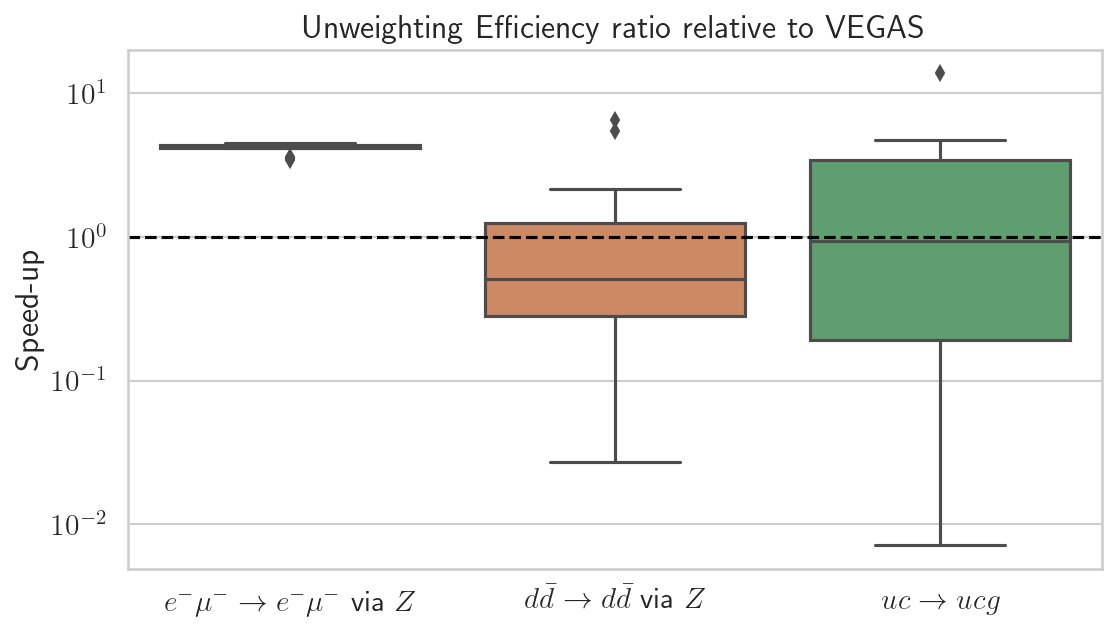

In [61]:
db=pd.DataFrame();

for j in ["emu_emu_","dd_dd_","uc_ucg_"]:

    temp=pd.DataFrame(np.genfromtxt(str(j)+str(20)+'.csv', delimiter=',', dtype=None, names=True, encoding='utf-8'))
    temp['process']=j
    db=pd.concat([db, temp])


db=db.loc[(db['survey_strategy']=='adaptive_dkl')]

fig, ax = plt.subplots(figsize=(7,4)) 
ax.set_title(r'Speed-up relative to VEGAS')
plt.tight_layout(pad=0)
ax = sns.boxplot(x='process', y='vegas_variance_ratio', data=db,ax=ax)
ax.set_xticklabels([r'$e^- \mu^- \rightarrow e^- \mu^- $ via $Z$',r'$d \bar d \rightarrow d \bar d $ via $Z$',r'$u c \rightarrow  ucg $' ])
ax.set_ylabel('Speed-up')
ax.set_xlabel('')
plt.axhline(1, c='black', ls='--')
plt.yscale('log')


fig, ax = plt.subplots(figsize=(7,4)) 
ax.set_title(r'Unweighting Efficiency ratio relative to VEGAS')
plt.tight_layout(pad=0)
ax = sns.boxplot(x='process', y='vegas_unweighting_eff_ratio', data=db,ax=ax)
ax.set_xticklabels([r'$e^- \mu^- \rightarrow e^- \mu^- $ via $Z$',r'$d \bar d \rightarrow d \bar d $ via $Z$',r'$u c \rightarrow  ucg $' ])
ax.set_ylabel('Speed-up')
ax.set_xlabel('')
plt.axhline(1, c='black', ls='--')
plt.yscale('log')


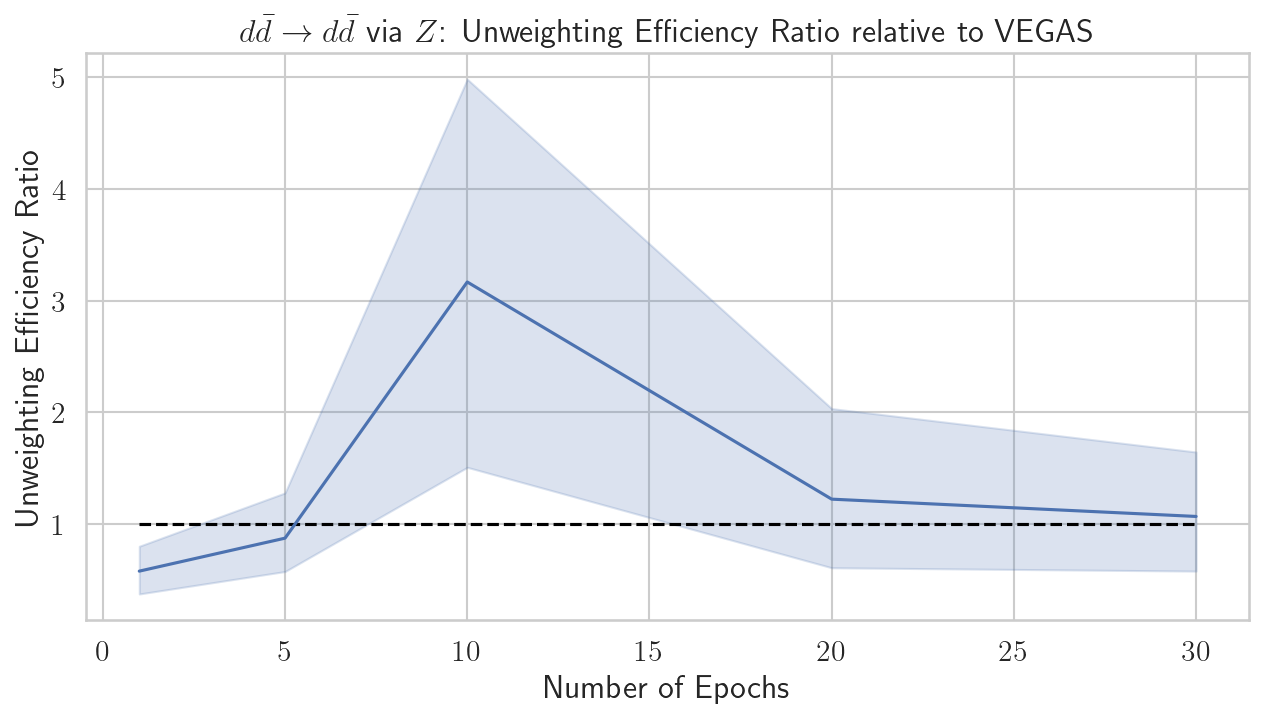

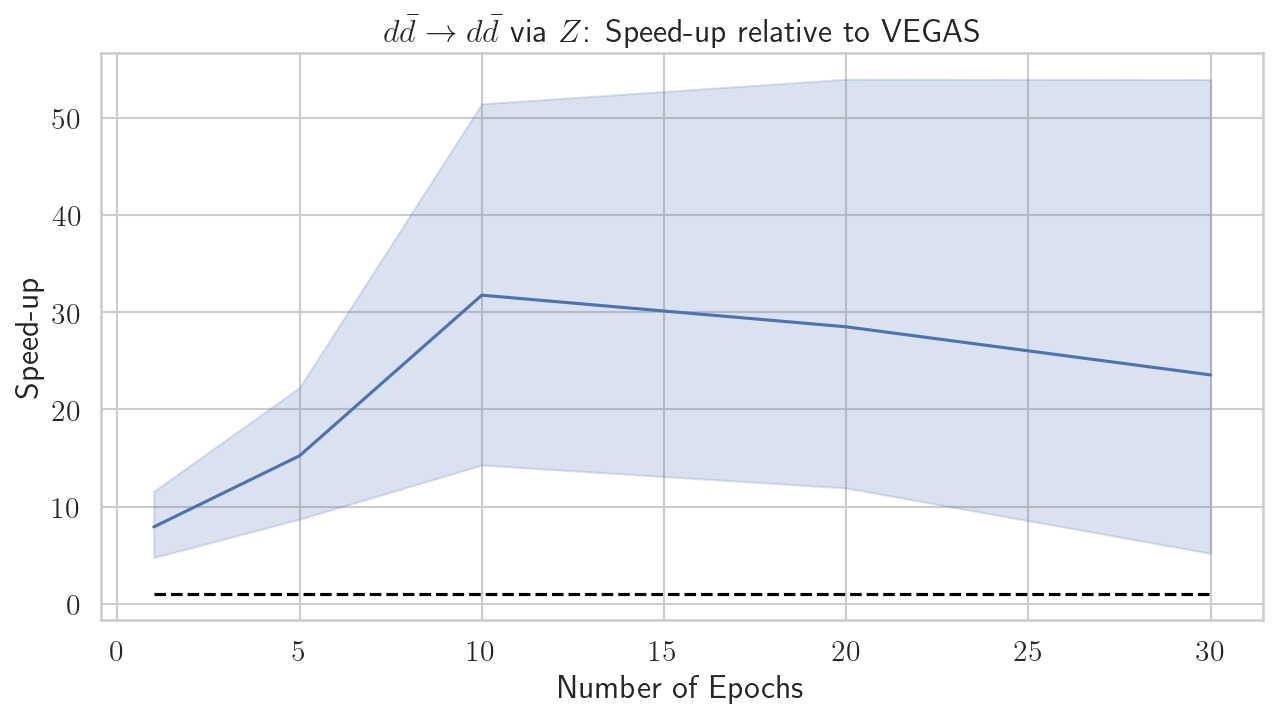

In [77]:
db=pd.DataFrame();

for i in [1,5,10,20,30]:

    temp=pd.DataFrame(np.genfromtxt('dd_dd_'+str(i)+'.csv', delimiter=',', dtype=None, names=True, encoding='utf-8'))
    temp['process']=j
    db=pd.concat([db, temp])

    
db=db.loc[(db['survey_strategy']=='adaptive_dkl')]  
fig, ax = plt.subplots(figsize=(10,5))
ax.set_xlabel('Number of Epochs')
ax.set_ylabel('Unweighting Efficiency Ratio')
ax.set_title(r'$d \bar d \rightarrow  d \bar d  $ via $Z$: Unweighting Efficiency Ratio relative to VEGAS')
ax.plot([db['n_epochs'].min(),db['n_epochs'].max()], [1.,1.],c='black',ls='--')
ax = sns.lineplot(data=db,x='n_epochs',y='vegas_unweighting_eff_ratio', ax=ax)

fig, ax = plt.subplots(figsize=(10,5))
ax.set_xlabel('Number of Epochs')
ax.set_ylabel('Speed-up')
ax.set_title(r'$d \bar d \rightarrow  d \bar d  $ via $Z$: Speed-up relative to VEGAS')
ax.plot([db['n_epochs'].min(),db['n_epochs'].max()], [1.,1.],c='black',ls='--')
ax = sns.lineplot(data=db,x='n_epochs',y='vegas_variance_ratio', ax=ax)
